# Dataset Information
   
   This is a standard supervised classification task.A classification problem where we have to predict whether a passenger would survive the Titanic or not. Below is the dataset attributes with description.
   
Variable | Description
----------|--------------
Passenger ID | Identification Number of Passenger
Sex | Male/ Female
Pclass | Passenger class(l,2,3)
Name | Name of the passenger
Age | Age of the passenger
SibSp | Number of sibling or spouse on the ship
Parch | Number of the children or parent on the ship
Ticket | Ticket Number
Fare | Price of the ticket
Cabin | Cabin number of the passenger
Embarked | Port of embarkation
Survived | Target Variable(value 0 for perished , 1 for survived

### Import module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print('The training dataset has ', df.shape )

The training dataset has  (891, 12)


# Preprocessing the dataset

### Finding Null Values 

In [7]:
# find the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# we have missing data in Age, Cabin and Embarked
# filling the Age with mean of Age and rounding it
#df['Age'] = df['Age'].fillna(round(df['Age'].mean(),0))

## Dropping Columns 

#### Dropping Column Cabin

In [9]:
# dropping Cabin Column
df = df.drop(['Cabin'], axis = 1)

#### Dropping Columns (PassengerID and Ticket)

In [10]:
##Dropping unnecessary columns (PassengerId, Ticket)

df = df.drop(['PassengerId'], axis = 1)
df = df.drop(['Ticket'], axis = 1)

## Handling Null Values 

In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

#### Handling Null Values in Embarked Column

In [12]:
#filling the Embarked with mode values (categorical)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [13]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

## Additional Columns 

#### Addition of Family Size Column

In [14]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

#### Addition of Title Column

In [15]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [16]:
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()

In [17]:
df['Title'] = df['Name'].apply(get_title)

In [18]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

## Handling null values in Age Column

In [19]:
age_mean = df.groupby('Title')['Age'].mean()
age_mean

Title
Capt            70.000000
Col             58.000000
Don             40.000000
Dr              42.000000
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           4.574167
Miss            21.773973
Mlle            24.000000
Mme             24.000000
Mr              32.368090
Mrs             35.898148
Ms              28.000000
Rev             43.166667
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [20]:
def fill_age(x):
    for index, age in zip(age_mean.index, age_mean.values):
        if x['Title'] == index:
            return age

In [21]:
df['Age'] = df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1)
df['Age'] = df.Age.round(1)

In [22]:
df.head(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Mr
5,0,3,"Moran, Mr. James",male,32.4,0,0,8.4583,Q,1,Mr
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1,Mr
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,5,Master
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3,Mrs
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,2,Mrs


### Drop Name Column

In [23]:
df = df.drop(['Name'], axis = 1)

In [24]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,male,22.0,1,0,7.2500,S,2,Mr
1,1,1,female,38.0,1,0,71.2833,C,2,Mrs
2,1,3,female,26.0,0,0,7.9250,S,1,Miss
3,1,1,female,35.0,1,0,53.1000,S,2,Mrs
4,0,3,male,35.0,0,0,8.0500,S,1,Mr
5,0,3,male,32.4,0,0,8.4583,Q,1,Mr
6,0,1,male,54.0,0,0,51.8625,S,1,Mr
7,0,3,male,2.0,3,1,21.0750,S,5,Master
8,1,3,female,27.0,0,2,11.1333,S,3,Mrs
9,1,2,female,14.0,1,0,30.0708,C,2,Mrs


In [25]:
# Create IsAlone feature

df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [26]:
# Mean of survival by IsAlone

df[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [27]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,2,Mr,0
1,1,1,female,38.0,1,0,71.2833,C,2,Mrs,0
2,1,3,female,26.0,0,0,7.9250,S,1,Miss,1
3,1,1,female,35.0,1,0,53.1000,S,2,Mrs,0
4,0,3,male,35.0,0,0,8.0500,S,1,Mr,1
5,0,3,male,32.4,0,0,8.4583,Q,1,Mr,1
6,0,1,male,54.0,0,0,51.8625,S,1,Mr,1
7,0,3,male,2.0,3,1,21.0750,S,5,Master,0
8,1,3,female,27.0,0,2,11.1333,S,3,Mrs,0
9,1,2,female,14.0,1,0,30.0708,C,2,Mrs,0


## Pclass and Sex

In [28]:
#df['PoorMen'] = (df['Sex'] == "male") + (df['Age'] > 16) and (df['Pclass'] == 3)
#third_class_adult_men = [(df['Sex'] == "male") and (df['Age'] > 16) and (df['Pclass'] == 3)]
#df['third_class_adult_men'] = third_class_adult_men
#df.head()
#poor_female = (df.Sex == "female") & (df.Pclass == 3) & (df.Age > 16)
#df["poor_female"] = poor_female
#rich_female = (df.Sex == "female") & (df.Pclass == 1) & (df.Age > 16)
#df["rich_female"] = rich_female

#poor_male = (df.Sex == "male") & (df.Pclass == 3) & (df.Age > 16)
#df["poor_male"] = poor_male
#rich_male = (df.Sex == "male") & (df.Pclass == 1) & (df.Age > 16)
#df["rich_male"] = rich_male

In [29]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,2,Mr,0
1,1,1,female,38.0,1,0,71.2833,C,2,Mrs,0
2,1,3,female,26.0,0,0,7.9250,S,1,Miss,1
3,1,1,female,35.0,1,0,53.1000,S,2,Mrs,0
4,0,3,male,35.0,0,0,8.0500,S,1,Mr,1
5,0,3,male,32.4,0,0,8.4583,Q,1,Mr,1
6,0,1,male,54.0,0,0,51.8625,S,1,Mr,1
7,0,3,male,2.0,3,1,21.0750,S,5,Master,0
8,1,3,female,27.0,0,2,11.1333,S,3,Mrs,0
9,1,2,female,14.0,1,0,30.0708,C,2,Mrs,0


# Exploratory Data Analysis

### Counting the number of males and females on board the Titanic

In [30]:
df['Sex'].value_counts(dropna = False)


male      577
female    314
Name: Sex, dtype: int64

### Graph plotting the number of males and females on board the Titanic

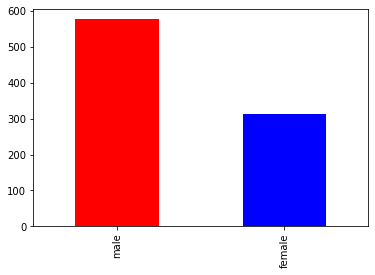

In [31]:
df['Sex'].value_counts().plot(kind='bar', color = ['r', 'b'])

### Counting the number of passengers within each class on board the Titanic

In [32]:
df['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Graph plotting the count of the number of passengers by Pclass on board the Titanic

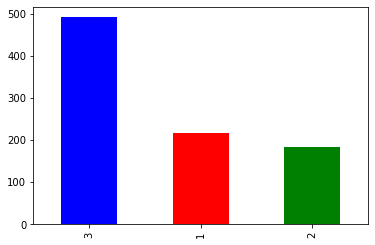

In [33]:
df['Pclass'].value_counts().plot(kind = 'bar', color = ['b', 'r', 'g'])

### Graph showing how many passengers by sex were in each Pclass

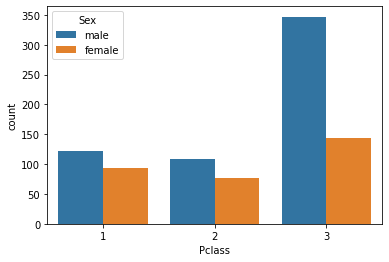

In [34]:
sns.countplot(x = df['Pclass'], hue=df["Sex"])

### Pie chart plotting count of passengers from point of Embarkation

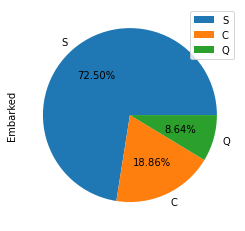

In [35]:
df['Embarked'].value_counts().plot(kind = 'pie', autopct='%1.2f%%')
plt.legend()


### Graph showing how many passengers by sex embarked from each location  

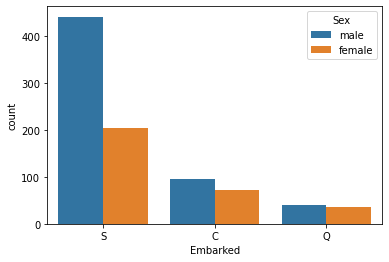

In [36]:
sns.countplot(x = df['Embarked'], hue=df["Sex"])

### Counting the distribution of SibSp on board the Titanic

In [37]:
df['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

### Graph showing distribution of SibSp on board the Titanic

Text(0.5, 1.0, 'Distribution of SibSp on board the Titanic')

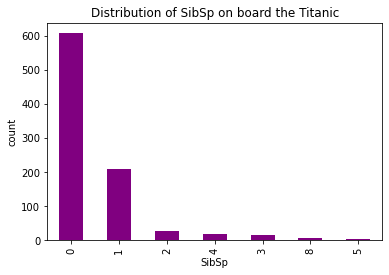

In [38]:
df['SibSp'].value_counts().plot(kind = 'bar', color = "purple")
plt.ylabel("count")
plt.xlabel("SibSp")
plt.title("Distribution of SibSp on board the Titanic")

### Counting the distribution of Parch on board the Titanic

In [39]:
df['Parch'].value_counts(dropna = False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### Graph showing distribution of Parch on board the Titanic

Text(0.5, 1.0, 'Distribution of Parch on board the Titanic')

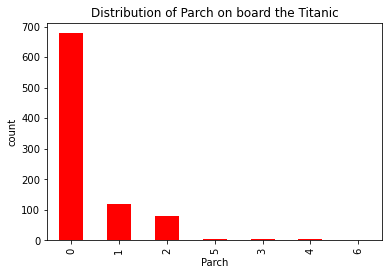

In [40]:
df['Parch'].value_counts().plot(kind = 'bar', color = "red")
plt.ylabel("count")
plt.xlabel("Parch")
plt.title("Distribution of Parch on board the Titanic")

### Counting the distribution of family size on board the Titanic

In [41]:
df['FamilySize'].value_counts(dropna = False)

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

### Graph plotting the distribution of family size  on board the Titanic

Text(0.5, 1.0, 'Distribution of Family Size on board the Titanic')

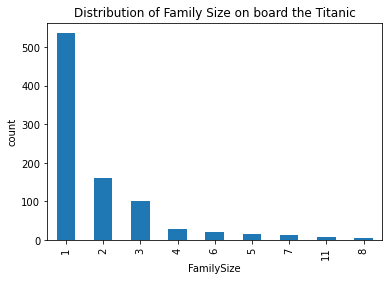

In [42]:
df['FamilySize'].value_counts().plot(kind = 'bar')
plt.ylabel("count")
plt.xlabel("FamilySize")
plt.title("Distribution of Family Size on board the Titanic")


### Age Distribution on the Titanic 

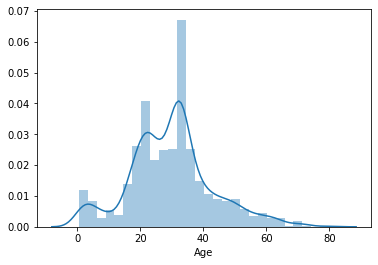

In [43]:
sns.distplot(df['Age'])

### Graph plot showing the Age Distribution by survival on the Titanic 

Text(0.5, 1.0, 'Age Distribution by Survival')

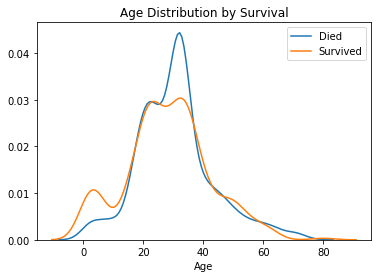

In [44]:
sns.kdeplot(df['Age'][df['Survived']== 0], label = 'Died')
sns.kdeplot(df['Age'][df['Survived']== 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Age Distribution by Survival')

### Fare Distribution on the Titanic

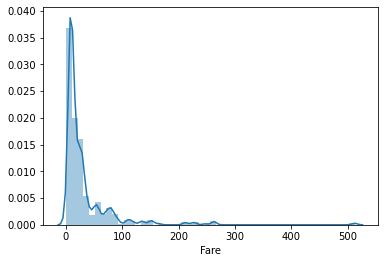

In [45]:
sns.distplot(df['Fare'])

# Subplots for Distribution of Features 

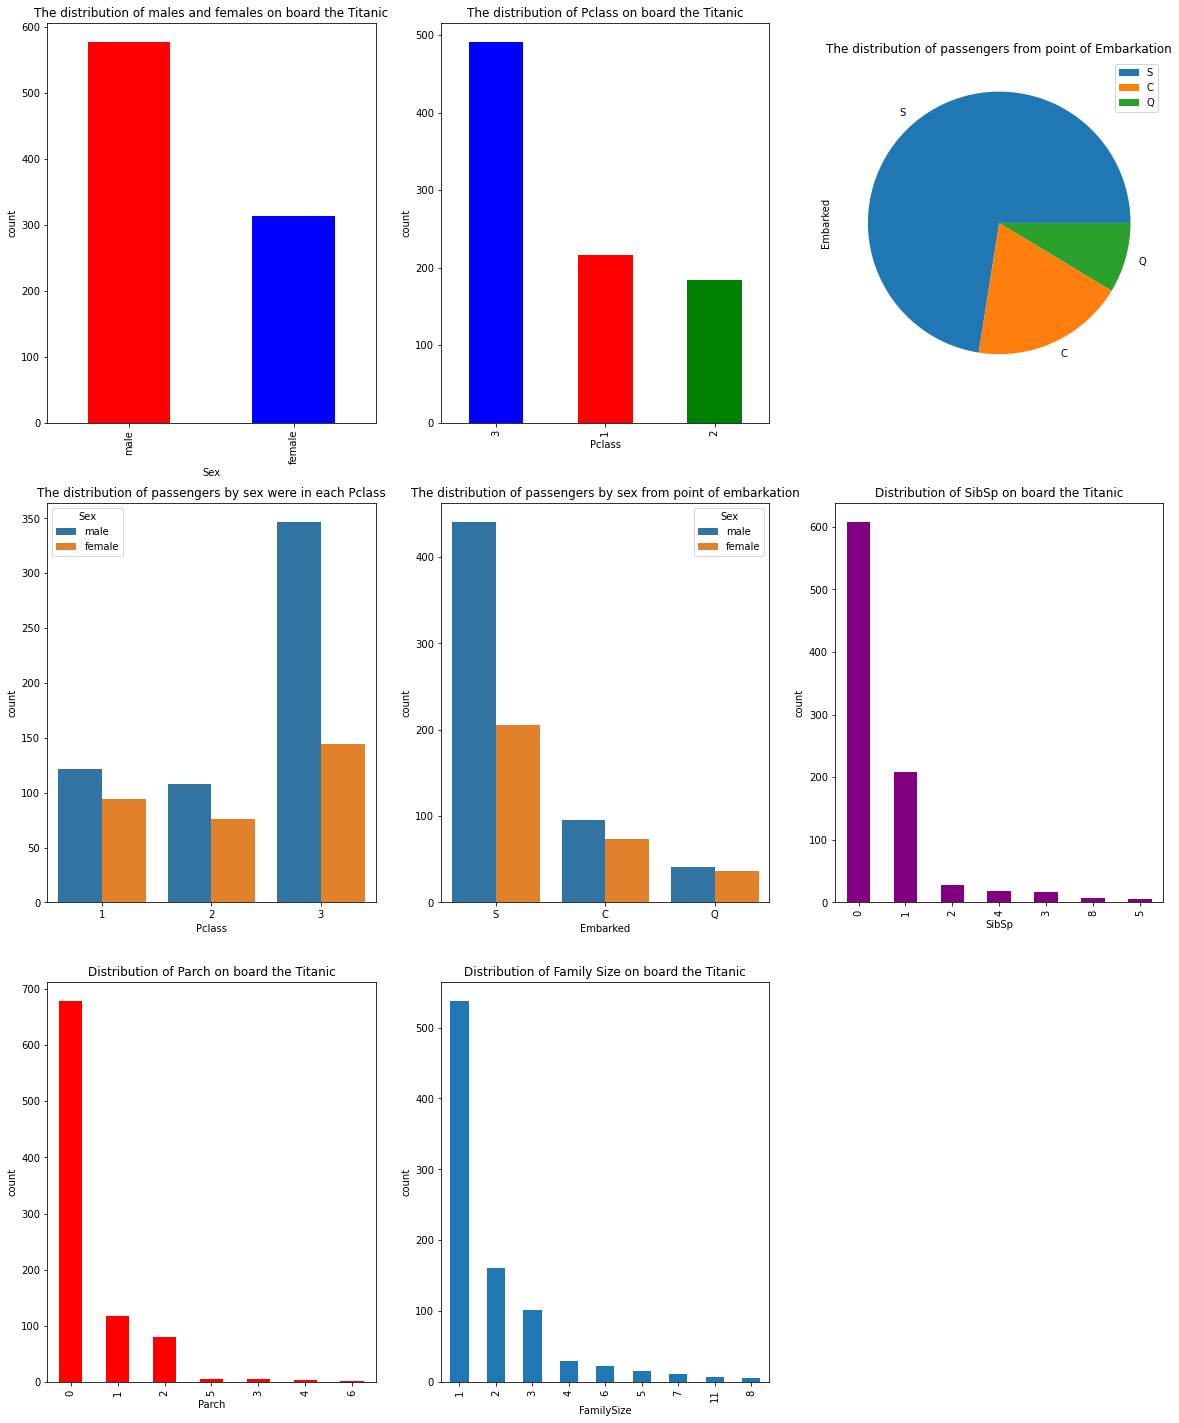

In [46]:
#import matplotlib.pylab as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,25))

plt.subplot(3, 3, 1)
plt.title("The distribution of males and females on board the Titanic")
df['Sex'].value_counts().plot(kind='bar', color = ['r', 'b'])
plt.ylabel("count")
plt.xlabel("Sex")
 #2 plots on top of each other, 3 columns, first plot
#plt.plot(ax=axes[0])
#plt.plot(df1)

plt.subplot(3, 3, 2)
plt.title("The distribution of Pclass on board the Titanic")
df['Pclass'].value_counts().plot(kind = 'bar', color = ['b', 'r', 'g'])
plt.ylabel("count")
plt.xlabel("Pclass")
 #2 plots on top of each other, 3 columns, first plot
#plt.plot(ax=axes[1])
#plt.plot(df2)


plt.subplot(3, 3, 3)
df['Embarked'].value_counts().plot(kind = 'pie')
plt.legend()
plt.title("The distribution of passengers from point of Embarkation")


plt.subplot(3, 3, 4)
sns.countplot(x = df['Pclass'], hue=df["Sex"])
plt.title("The distribution of passengers by sex were in each Pclass")
#plt.plot(ax=axes[2])

plt.subplot(3, 3, 5)
sns.countplot(x = df['Embarked'], hue=df["Sex"])
plt.title("The distribution of passengers by sex from point of embarkation")

plt.subplot(3, 3, 6)
df['SibSp'].value_counts().plot(kind = 'bar', color = "purple")
plt.ylabel("count")
plt.xlabel("SibSp")
plt.title("Distribution of SibSp on board the Titanic")
#df['Pclass'].plot(ax=axes[0])

plt.subplot(3, 3, 7)
df['Parch'].value_counts().plot(kind = 'bar', color = "red")
plt.ylabel("count")
plt.xlabel("Parch")
plt.title("Distribution of Parch on board the Titanic")

plt.subplot(3, 3, 8)
df['FamilySize'].value_counts().plot(kind = 'bar')
plt.ylabel("count")
plt.xlabel("FamilySize")
plt.title("Distribution of Family Size on board the Titanic")


plt.show()

# Graphs showing how the features correlate with survival

### Mean of Survival by Sex 

Female passengers have a higher mean of survival than male passengers and reason for this is that female a passengers were prioritized during the Titanic evacuation

In [47]:
df[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Barplot showing the survival rate by Sex

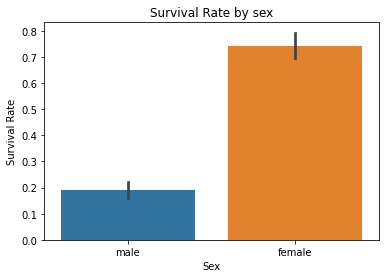

In [48]:
sns.barplot(x = 'Sex', y = 'Survived', data = df)
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.title('Survival Rate by sex')
plt.show()

### Mean of Survival by Pclass

In [49]:
df[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Barplot showing the survival rate by Pclass

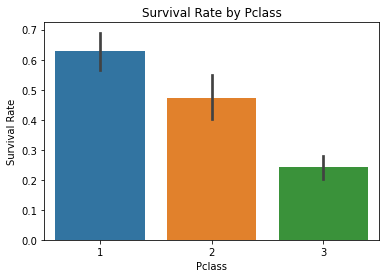

In [50]:
sns.barplot(x = 'Pclass', y = 'Survived', data = df)
plt.ylabel('Survival Rate')
plt.xlabel('Pclass')
plt.title('Survival Rate by Pclass')

plt.show()

### Catplot showing the survival rate of passengers by sex for each Pclass

Text(0.5, 1.0, 'Survival Rate by Sex and Pclass')

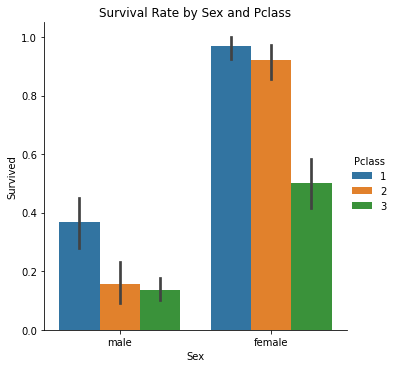

In [51]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df)
plt.title("Survival Rate by Sex and Pclass")

### Mean of Survival by point of Embarkation

In [52]:
df[['Embarked', 'Survived']].groupby('Embarked', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Barplot showing the survival rate by point of Embarkation

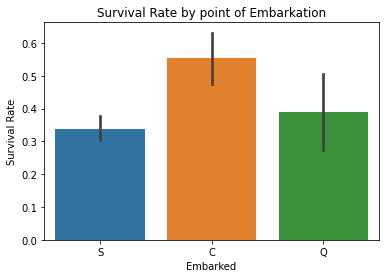

In [53]:
sns.barplot(x = 'Embarked', y = 'Survived', data = df)
plt.ylabel('Survival Rate')
plt.xlabel('Embarked')
plt.title('Survival Rate by point of Embarkation')

plt.show()

## need to check but shows that majority of first class passengers embarked from location C

### Factorplot of count of people by Pclass that Embarked from each location
Proof of hypothesis that majority of 1st class passengers embarked from C compared to S where majority of 3rd class passengers emabarked and therefore had a lower survival rate

C:\Users\Cecile\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


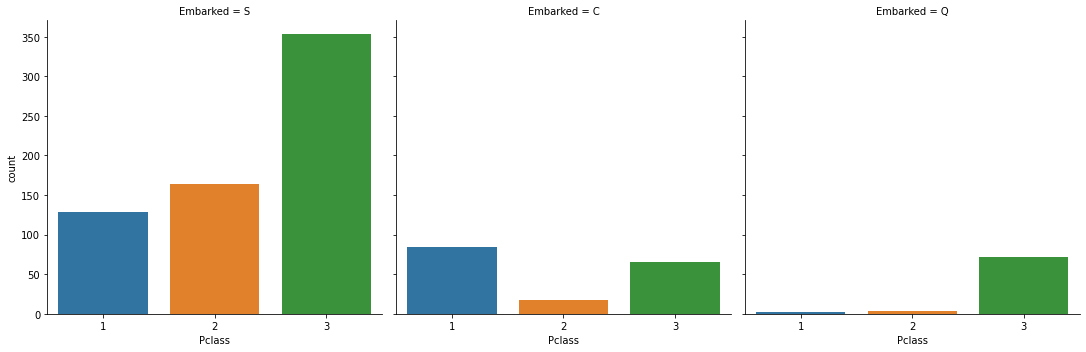

In [54]:
sns.factorplot('Pclass', col = 'Embarked', data = df, kind = 'count')
#shows count of people by Pclass that have embarked from each location

 ### Mean of Survival by SibSp

In [55]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### Barplot showing the Survival Rate by SibSp

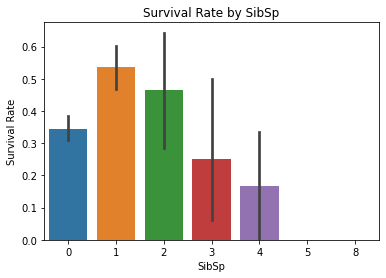

In [56]:
sns.barplot(x = 'SibSp', y = 'Survived', data = df)
plt.ylabel('Survival Rate')
plt.xlabel('SibSp')
plt.title('Survival Rate by SibSp')

plt.show()


 ### Mean of Survival by Parch

In [57]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Barplot showing the Survival Rate by Parch

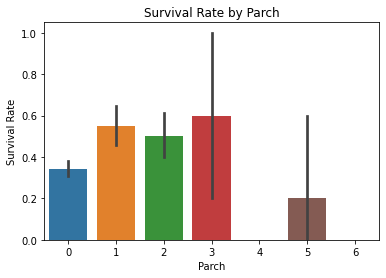

In [58]:
sns.barplot(x = 'Parch', y = 'Survived', data = df)
plt.ylabel('Survival Rate')
plt.xlabel('Parch')
plt.title('Survival Rate by Parch')

plt.show()

### Mean of Survival by Family Size

In [59]:
df[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


### Barplot showing the Survival Rate by Family Size

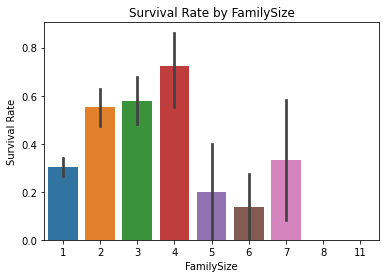

In [60]:
sns.barplot(x = 'FamilySize', y = 'Survived', data = df)
plt.ylabel('Survival Rate')
plt.xlabel('FamilySize')
plt.title('Survival Rate by FamilySize')

plt.show()

# Subplots of Survival Rate by Feature

Have not included the graphs survival rate by sex and Pclass as not able to fit into subplot. Have also not included the graphs Factorplot of count of people by Pclass that Embarked from each location as not able to fit on plot. Both these graphs will go into the report. 

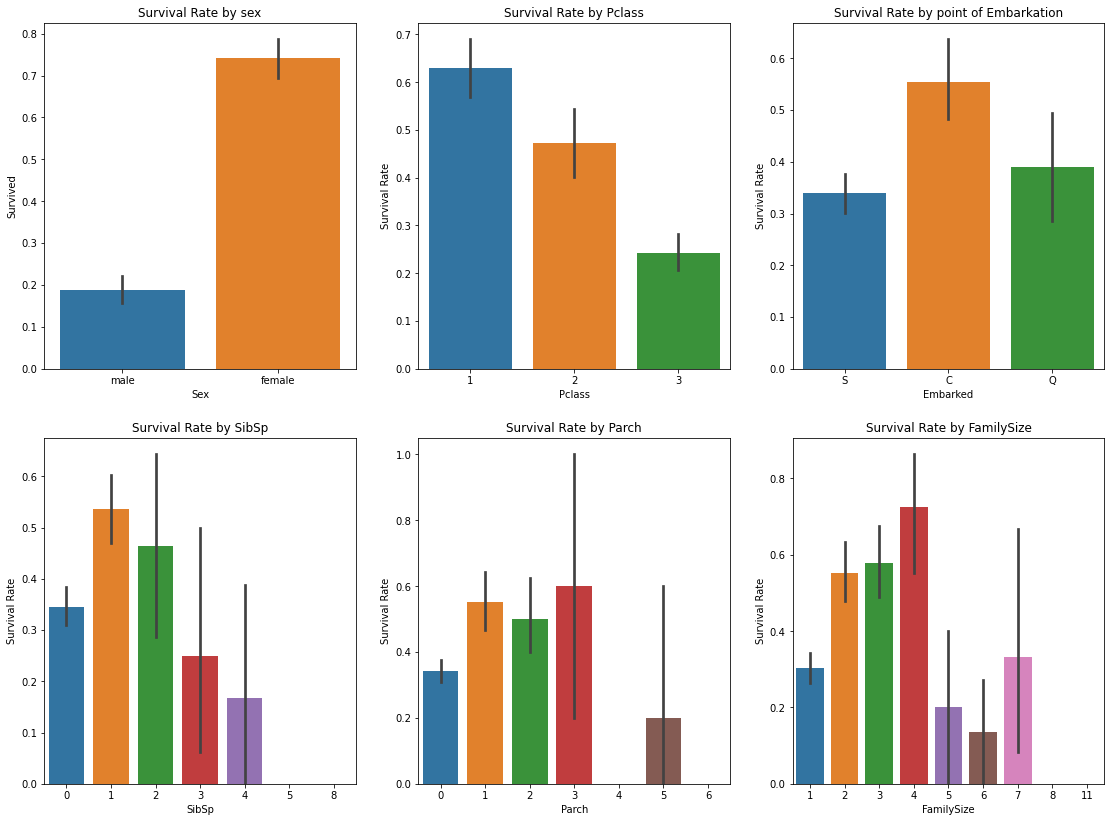

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (19,14))

plt.subplot(2, 3, 1)
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.title('Survival Rate by sex')
sns.barplot(x = 'Sex', y = 'Survived', data = df)

plt.subplot(2, 3, 2)
sns.barplot(x = 'Pclass', y = 'Survived', data = df)
plt.ylabel('Survival Rate')
plt.xlabel('Pclass')
plt.title('Survival Rate by Pclass')

#plt.subplot(2, 3, 3)
#sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df)
#plt.title("Survival Rate by Sex and Pclass")

plt.subplot(2, 3, 3)
sns.barplot(x = 'Embarked', y = 'Survived', data = df)
plt.ylabel('Survival Rate')
plt.xlabel('Embarked')
plt.title('Survival Rate by point of Embarkation')


plt.subplot(2, 3, 4)
sns.barplot(x = 'SibSp', y = 'Survived', data = df)
plt.ylabel('Survival Rate')
plt.xlabel('SibSp')
plt.title('Survival Rate by SibSp')

plt.subplot(2, 3, 5)
sns.barplot(x = 'Parch', y = 'Survived', data = df)
plt.ylabel('Survival Rate')
plt.xlabel('Parch')
plt.title('Survival Rate by Parch')
df['Pclass'].plot(ax=axes[0])

plt.subplot(2, 3, 6)
sns.barplot(x = 'FamilySize', y = 'Survived', data = df)
plt.ylabel('Survival Rate')
plt.xlabel('FamilySize')
plt.title('Survival Rate by FamilySize')


plt.show()

# Changing Categorical Data to Numerical

### Changing Sex and Embarked to numerical values 

In [62]:
# Changing from Categorical (Sex, Embarked) to numerical values for data analytics
from sklearn.preprocessing import LabelEncoder

In [63]:
cols = ['Sex', 'Embarked']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [64]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,IsAlone
0,0,3,1,22.0,1,0,7.2500,2,2,Mr,0
1,1,1,0,38.0,1,0,71.2833,0,2,Mrs,0
2,1,3,0,26.0,0,0,7.9250,2,1,Miss,1
3,1,1,0,35.0,1,0,53.1000,2,2,Mrs,0
4,0,3,1,35.0,0,0,8.0500,2,1,Mr,1
5,0,3,1,32.4,0,0,8.4583,1,1,Mr,1
6,0,1,1,54.0,0,0,51.8625,2,1,Mr,1
7,0,3,1,2.0,3,1,21.0750,2,5,Master,0
8,1,3,0,27.0,0,2,11.1333,2,3,Mrs,0
9,1,2,0,14.0,1,0,30.0708,0,2,Mrs,0


### Replacing Titles

In [65]:
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess', 'Sir', 'Dona'], 'Other')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

### Changing Titles to numerical values 

In [66]:
#change = {'Mr': 0, 'Mrs': 1, 'Miss': 2 , 'Master': 3, 'Don': 4, 'Rev': 5, 'Dr': 6,'Major': 7, 'Lady': 8, 'Sir': 9, 'Col': 10, 'Capt': 11, 'the Countess': 12,'Jonkheer': 13}
change = {'Mr': 0, 'Mrs': 1, 'Miss': 2 , 'Master':3,'Other': 5}
data = [df]
for dataset in data:
    dataset['Title'] = dataset['Title'].map(change)

In [67]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,IsAlone
0,0,3,1,22.0,1,0,7.2500,2,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,2,1,0
2,1,3,0,26.0,0,0,7.9250,2,1,2,1
3,1,1,0,35.0,1,0,53.1000,2,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,1,0,1


In [68]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Title         0
IsAlone       0
dtype: int64

## Table showing Title with corresponding number 


Title | Number
----------|--------------
Mr | 0
Mrs | 1
Miss | 2
Master | 3
Don | 4
Rev | 5
Dr | 6
Mme | 7
Ms | 8
Major | 9
Lady | 10
Sir | 11
Mlle | 12
Col | 13
Capt | 14
the Countess | 15
Jonkheer | 16

# Normalization and Scaling All Data in DF

In [69]:
#df = df.drop(['Survived'], axis = 1)

In [70]:
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
#df.Age = scaler.fit_transform(df.Age.values.reshape(-1,1))
#df.Fare = scaler.fit_transform(df.Fare.values.reshape(-1,1))
scaler.fit(df)
#df.Age = scaler.fit_transform(df['Age'])
df_scaled = scaler.fit_transform(df)

In [71]:
df.head(30)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,IsAlone
0,0,3,1,22.0,1,0,7.2500,2,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,2,1,0
2,1,3,0,26.0,0,0,7.9250,2,1,2,1
3,1,1,0,35.0,1,0,53.1000,2,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,1,0,1
5,0,3,1,32.4,0,0,8.4583,1,1,0,1
6,0,1,1,54.0,0,0,51.8625,2,1,0,1
7,0,3,1,2.0,3,1,21.0750,2,5,3,0
8,1,3,0,27.0,0,2,11.1333,2,3,1,0
9,1,2,0,14.0,1,0,30.0708,0,2,1,0


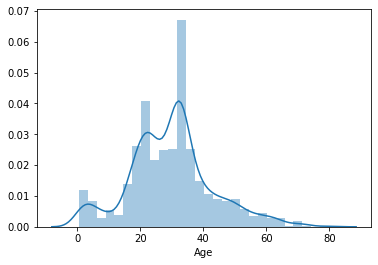

In [72]:
# Analysing numerical data for normalised distribution
#plt.figure(figsize=(20,5))
sns.distplot(df['Age'])

In [73]:
#df['Age_Log'] = np.log(df['Age'])

In [74]:
#sns.distplot(df['Age_Log'])

In [75]:
#df['Age'] = df['Age'].map(lambda x: np.log(x) if x > 0 else 0)

In [76]:
# Passenger fare distribution after log transformation

#sns.distplot(df['Age'], label = 'Skewness: %.2f'%(df['Age'].skew()))
#plt.legend(loc = 'best')
#plt.title('Passenger Age Distribution After Log Transformation')

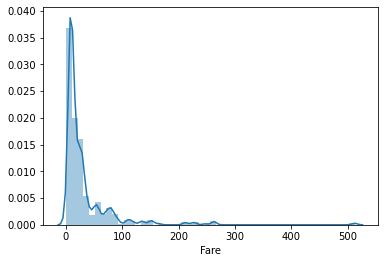

In [77]:
sns.distplot(df['Fare'])

In [78]:
# Apply log transformation to Fare column to reduce skewness

df['Fare'] = df['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

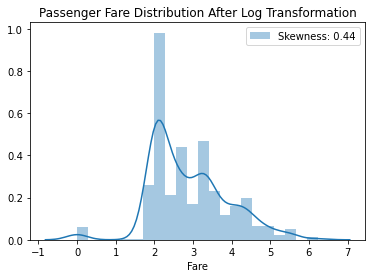

In [79]:
# Passenger fare distribution after log transformation

sns.distplot(df['Fare'], label = 'Skewness: %.2f'%(df['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

In [80]:
#df['Fare_Log'] = np.log(df['Fare'])

In [81]:
#sns.distplot(df['Fare_Log'])

In [82]:
# normalising the Fare and Age data
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html 

#from sklearn.preprocessing import Normalizer
#Scalar = Normalizer()
#dffnew = np.column_stack((df['Fare'], df['Age']))
#dffnew = Scalar.fit_transform(dffnew)
#dff1 = pd.DataFrame(dffnew)
#dff1.columns = ['FareScaled', 'AgeScaled']
#dff['FareScaled'] = dff1['FareScaled']
#dff['AgeScaled'] = dff1['AgeScaled']

In [83]:
#sns.distplot(df['AgeScaled'])

In [84]:
#sns.distplot(df['FareScaled'])

# Feature Engineering 

### Correlation Matrix

In [85]:
corr=df.corr()

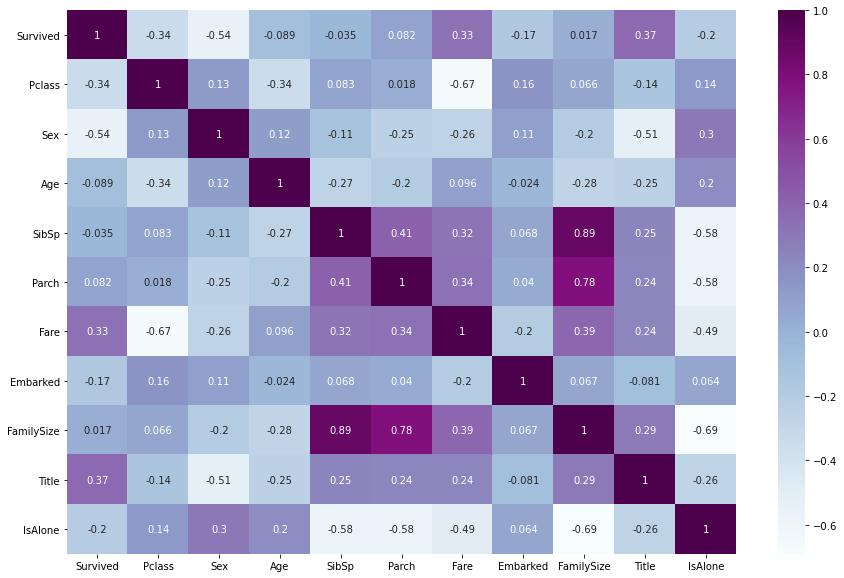

In [86]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

### Drop SibSp and Parch column due to high correlation to family size

In [87]:
df = df.drop(['SibSp'], axis = 1)
df = df.drop(['Parch'], axis = 1)

In [88]:
df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,IsAlone
0,0,3,1,22.0,1.981001,2,2,0,0
1,1,1,0,38.0,4.266662,0,2,1,0
2,1,3,0,26.0,2.070022,2,1,2,1
3,1,1,0,35.0,3.972177,2,2,1,0
4,0,3,1,35.0,2.085672,2,1,0,1
5,0,3,1,32.4,2.135148,1,1,0,1
6,0,1,1,54.0,3.948596,2,1,0,1
7,0,3,1,2.0,3.048088,2,5,3,0
8,1,3,0,27.0,2.409941,2,3,1,0
9,1,2,0,14.0,3.403555,0,2,1,0


In [89]:
# specify input and output attribute
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [90]:
# select k best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [91]:
# apply k-best algorithm
kbest = SelectKBest(score_func = chi2, k = 'all')
ordered_features = kbest.fit(X,y)

In [92]:
df_scores = pd.DataFrame(ordered_features.scores_, columns=['Score'])

In [93]:
df_columns = pd.DataFrame(X.columns, columns = ['Feature_name'])

In [94]:
feature_rank = pd.concat([df_scores,df_columns],axis=1)

In [95]:
feature_rank.nlargest(7,'Score')

,Score,Feature_name
6,205.336697,Title
1,92.702447,Sex
2,42.008978,Age
3,34.056069,Fare
0,30.873699,Pclass
7,14.640793,IsAlone
4,10.202525,Embarked


### Feature Importance

In [96]:
from sklearn.ensemble import ExtraTreesClassifier

In [97]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [98]:
model.feature_importances_

array([0.10264434, 0.21100139, 0.22917261, 0.23732657, 0.03231656,
       0.05509532, 0.11540077, 0.01704244])

In [99]:
ranked_features = pd.Series(model.feature_importances_, index = X.columns)

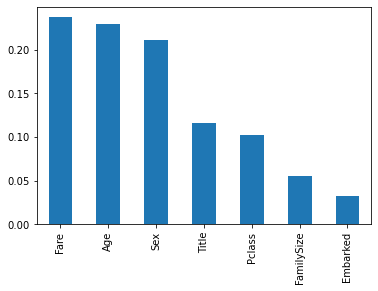

In [100]:
ranked_features.nlargest(7).plot(kind='bar')

### Information Gain

In [101]:
from sklearn.feature_selection import mutual_info_classif
mu_ifo = mutual_info_classif(X,y)

In [102]:
mu_data = pd.Series(mu_ifo, index = X.columns)
mu_data.sort_values(ascending=False)

Sex           0.160099
Title         0.151285
Fare          0.126619
Pclass        0.055784
IsAlone       0.045735
Age           0.042932
FamilySize    0.034213
Embarked      0.003025
dtype: float64

# Train Test Split

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# Modelling and Cross Validation

In [104]:
from sklearn.model_selection import cross_val_score

In [105]:
def classify(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy is: ', model.score(x_test,y_test)*100)
    score = cross_val_score(model,x,y,cv=5)
    print('Cross validation Accuaracy: ', np.mean(score)*100)

## Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
classify(clf, X,y)

C:\Users\Cecile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Cecile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Accuracy is:  81.56424581005587
Cross validation Accuaracy:  80.2479442596196


C:\Users\Cecile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Trees

In [107]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
classify(clf, X,y)
#decision_tree.fit(X_train, Y_train)
#Y_pred = decision_tree.predict(X_test)
#acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
#acc_decision_tree

Accuracy is:  79.3296089385475
Cross validation Accuaracy:  77.10501537882116


## Random Forest 

In [108]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
classify(clf, X,y)


Accuracy is:  83.79888268156425
Cross validation Accuaracy:  79.91149331492059


## KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
classify(knn,X,y)

Accuracy is:  77.6536312849162
Cross validation Accuaracy:  77.44523256543845


## SVC

In [110]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C = 1)
classify(clf, X,y)

Accuracy is:  78.2122905027933
Cross validation Accuaracy:  78.44830832967172


## Confusion Matrix

### Decision Trees

In [111]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [112]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [113]:
y_pred = clf.predict(x_test)

In [114]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

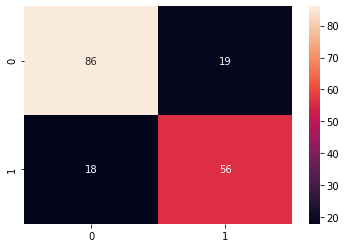

In [115]:
sns.heatmap(cm,annot=True)

In [116]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Random Forest 

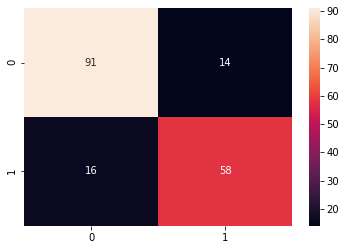

In [117]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

### Logistic Regression

C:\Users\Cecile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


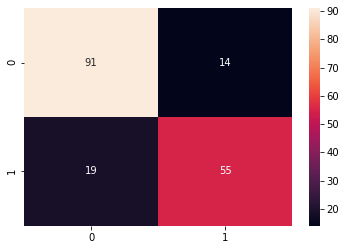

In [118]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [119]:
from sklearn.metrics import precision_recall_fscore_support 
Score_model = {} 
clfs = [RandomForestClassifier(), LogisticRegression(), DecisionTreeClassifier()] 
models = ['RandomForest', 'LogisticRegression', 'DecisionTreeClassificer'] 
for i in range(3): 
    clf = clfs[i] 
    clf.fit(x_train,y_train) 
    y_pred = clf.predict(x_test) 
    (precision, recall, fscore, none) = precision_recall_fscore_support(y_test, y_pred, average='binary') 
    print("\nModel: ", models[i],"[\nprecision:", precision,"],[recall:",recall, "],[fscore:", fscore,"] ")


Model:  RandomForest [
precision: 0.7916666666666666 ],[recall: 0.7702702702702703 ],[fscore: 0.7808219178082192 ] 

Model:  LogisticRegression [
precision: 0.7971014492753623 ],[recall: 0.7432432432432432 ],[fscore: 0.7692307692307693 ] 

Model:  DecisionTreeClassificer [
precision: 0.7534246575342466 ],[recall: 0.7432432432432432 ],[fscore: 0.7482993197278911 ] 


C:\Users\Cecile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
